In [2]:
import pandas as pd
from sqlalchemy import create_engine

# --- 1. Database Connection Details ---
# These should be the same as in your cleaning notebook.
db_config = {
    'user': 'root',
    'password': 'password', # Replace with your password
    'host': '127.0.0.1', # This means your local machine
}

db_name = 'els2002_selected_columns'
table_name = 'els_2002_data'

# --- 2. Create the Connection Engine ---
# This engine is what allows pandas to communicate with your database.
try:
    engine_string = f"mysql+mysqlconnector://{db_config['user']}:{db_config['password']}@{db_config['host']}/{db_name}"
    engine = create_engine(engine_string)
    print("✅ Connection engine created successfully.")

except Exception as e:
    print(f"❌ Failed to create engine: {e}")

# --- 3. Write and Execute the SQL Query ---
# This is a simple query to select everything from your table.
query = f"SELECT * FROM {table_name}"

try:
    # Use pandas to execute the query and load the result into a DataFrame
    df = pd.read_sql_query(query, engine)
    
    print(f"✅ Data successfully loaded from '{table_name}' into a DataFrame.")
    print("DataFrame shape:", df.shape)
    
except Exception as e:
    print(f"❌ Failed to load data from SQL: {e}")

engine.dispose()  # Close the connection to the database

del db_config, query, table_name, db_name, engine_string

✅ Connection engine created successfully.
✅ Data successfully loaded from 'els_2002_data' into a DataFrame.
DataFrame shape: (14654, 42)


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='BYTXMSTD', ylabel='BYTXRSTD'>

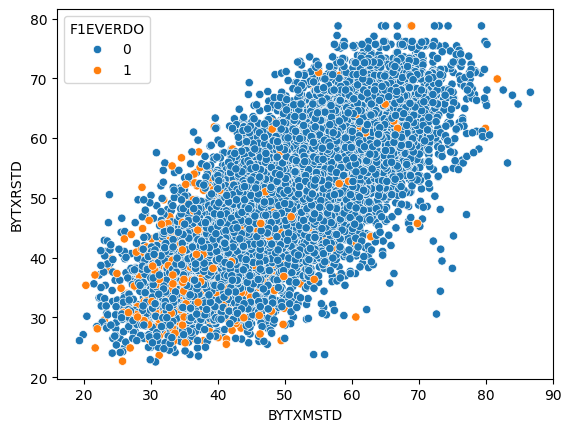

In [4]:
#Y is standard reading, and X is standard math scores. Orange are dropouts and Blue are non-dropouts.
#Relabel axis and key, find a way to reduce overlap
sns.scatterplot(data=df, x='BYTXMSTD', y='BYTXRSTD', hue='F1EVERDO') 

<Axes: xlabel='F1EVERDO', ylabel='BYS24B'>

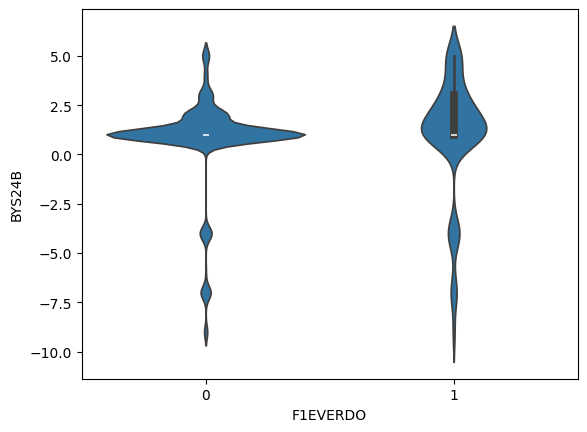

In [8]:
#cutting/skipping class, shows us that non-dropouts are more numerous however, dropouts consistently leave negative/missing values as well as have
#a denser skipping/cutting rate in the higher digits
#rename axis, talk about removing or just making all negative values one shared negative value
sns.violinplot(data=df, x="F1EVERDO", y='BYS24B')

<Axes: xlabel='BYINCOME', ylabel='Density'>

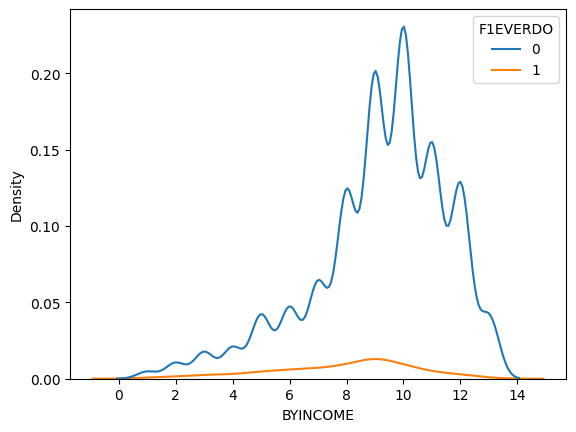

In [9]:
#shows that despite the shear difference in amount of students in the dropout and nondropout that the general income distribution
#is the same.
#Rename axis and key, remove any negatives
sns.kdeplot(data=df, x='BYINCOME', hue='F1EVERDO')